# Business Problem

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

# Business Goal

predict if the customer is going to honor the reservation or cancel it

# 2. About DataSet

**About this file**

The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

**Data Dictionary**

**Booking_ID:** unique identifier of each booking

**no_of_adults:** Number of adults

**no_of_children:** Number of Children

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan:** Type of meal plan booked by the customer:

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time:** Number of days between the date of booking and the arrival date

**arrival_year:** Year of arrival date

**arrival_month:** Month of arrival date

**arrival_date:** Date of the month

**market_segment_type:** Market segment designation.

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status:** Flag indicating if the booking was canceled or not.

# 0. Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pickle as pkl
from sklearn.linear_model import LogisticRegression

# 1. Read,Understand data

In [3]:
data=pd.read_csv('Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
data.shape

(36275, 19)

In [5]:
#check duplicates
data.duplicated().sum()

0

In [6]:
#Booking_ID column
if len(set(data['Booking_ID']))==len(data):
    data.drop('Booking_ID',axis=1,inplace=True)

In [7]:
#check duplicates
data.duplicated().sum()

10275

In [8]:
#Remove duplicated Rows
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.head()


# but reset_index generate new column called index that include the index of last version, but i didn't need it

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
#Remove index column
data.drop('index',axis=1,inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [10]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
#info about each column
def column_info(data):
    cols=[]
    dtype=[]
    unique_v=[]
    nunique=[]

    for col in data.columns:
        cols.append(col)
        dtype.append(data[col].dtype.name)
        unique_v.append(data[col].unique())
        nunique.append(data[col].nunique())

    return pd.DataFrame({'Column':cols,"Data type":dtype,"Unique Values":unique_v,"num_unique values":nunique})


In [12]:
column_info(data)

,Column,Data type,Unique Values,num_unique values
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5
1,no_of_children,int64,"[0, 2, 1, 3, 10, 9]",6
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4
5,required_car_parking_space,int64,"[0, 1]",2
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352
8,arrival_year,int64,"[2017, 2018]",2
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12


In [13]:
#no_of_adults
data['no_of_adults'].isna().sum()

0

In [14]:
data['no_of_adults'].value_counts()

no_of_adults
2    18871
1     4800
3     2178
0      135
4       16
Name: count, dtype: int64

adult= zero should'nt equal zero
https://www.booking.com/


Handle Outliers or wrong values

In [15]:
zero_no_adults=data[data['no_of_adults']==0]
zero_no_adults['booking_status'].value_counts()

# 43 canceldd is logic but 92 not canceled is not logic

booking_status
Not_Canceled    92
Canceled        43
Name: count, dtype: int64

In [16]:
data[data['no_of_adults']==0]['no_of_children'].value_counts()

#  so it is logic, parent reserve another room to thier childrens bur not sit with them

no_of_children
2    129
3      5
1      1
Name: count, dtype: int64

In [17]:
data[data['no_of_children']==10]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5289,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled


In [18]:
data[data['no_of_children']==9]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8180,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.0,0,Not_Canceled
8196,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.5,1,Canceled


 the numbers of childrens are 10 or 9 is very more and the numbers of frequency is small. so it's outliers

In [19]:
data['no_of_children'].value_counts()

no_of_children
0     23422
1      1524
2      1033
3        18
9         2
10        1
Name: count, dtype: int64

In [20]:
data['no_of_children'].replace(9,0,inplace=True)
data['no_of_children'].replace(10,0,inplace=True)

In [21]:
data['no_of_children'].value_counts()

no_of_children
0    23425
1     1524
2     1033
3       18
Name: count, dtype: int64

Handle Outliers or wrong values

In [22]:
#no_of_weekend_nights and no_of_week_nights
#check null value
data['no_of_weekend_nights'].isna().sum()

0

In [23]:
#check null value
data['no_of_week_nights'].isna().sum()

0

check wrong values in no_of_weekend_nights

In [24]:
data[data['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

# 75 value is not correct as no logic man go to the hotel and not reserve at leat one day

no_of_week_nights
1    3876
2    3089
3    2606
4    1237
5     204
0      75
Name: count, dtype: int64

In [25]:
zero_val_in_weekend=data[data['no_of_weekend_nights']==0]
zero_val_in_weekend[zero_val_in_weekend['no_of_week_nights']==0]['booking_status'].value_counts()

# may be canceled? we  found already two canceled but still there are 73 not canceled.

booking_status
Not_Canceled    73
Canceled         2
Name: count, dtype: int64

In [26]:
for i in range(len(data)):
  if data.loc[i, 'no_of_weekend_nights']==0 and data.loc[i, 'no_of_week_nights']==0:
    data.loc[i, 'no_of_week_nights']=1  # 1 because of most frequent

In [27]:
data[data['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

no_of_week_nights
1    3951
2    3089
3    2606
4    1237
5     204
Name: count, dtype: int64

In [28]:
#lead_time( numbers of dayes between reserve ane deliver and the maximum is 459)
#check null values
data['lead_time'].isna().sum()

0

In [ ]:

plt.figure(figsize=(6,4))
sns.distplot(data['lead_time'])
plt.show()

check outliers in this column

In [ ]:
print("Min Value  : ",data['lead_time'].min(),"Max Value : ",data['lead_time'].max())

In [ ]:
filtered_df = data[data['lead_time'] > 100]
counts = filtered_df.groupby(filtered_df.columns.tolist()).size()
len(counts)

In [ ]:
filtered_df['booking_status'].value_counts()

#Encoding

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data['booking_status']=le.fit_transform(data['booking_status'])
# data['booking_status'].value_counts()

In [ ]:
# data=pd.get_dummies(data,drop_first=True)
# data.head()

In [ ]:
#categorical features
cat_features=[]
for col in data.columns:
    if data[col].dtype=='object':
        cat_features.append(col)

In [ ]:
cat_features

In [4]:
for col in cat_features:
    print(col)
    print(data[col].value_counts())
    print("##############################################")

NameError: name 'cat_features' is not defined

In [5]:
col='ali'
print("{}_le.pkl".format(col))

ali_le.pkl


In [ ]:
# #convert categorical feature to numeric
# #convert categorical feature to numeric
from sklearn.preprocessing import LabelEncoder
for col in cat_features:

    le=LabelEncoder()

    data[col]=le.fit_transform(data[col])

    pkl.dump(le,open("{}_le.pkl".format(col),"wb"))


# #will save encoder to give the feature in deploymnet the same number that took it in the training
# # here we have

#check Balance

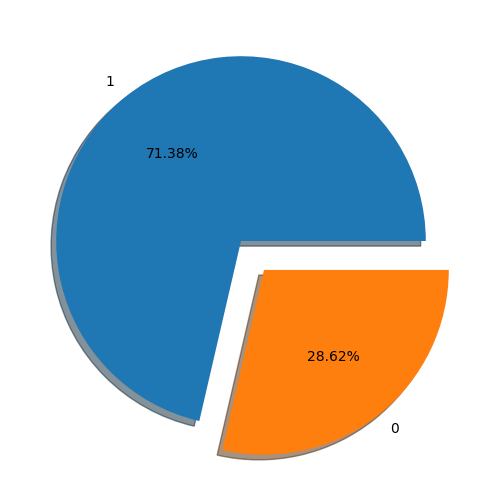

In [ ]:
#booking_status columns
plt.figure(figsize=(8,6))
plt.pie(x=data['booking_status'].value_counts(),labels=data['booking_status'].unique(),explode=[0.0,0.2],autopct='%0.2f%%',shadow=True)
plt.show()

#  The explode parameter is used to explode (separate) one of the slices from the rest of the pie.
#  In your code, the first slice (0.0 index) will not be exploded, and the second slice (0.2 index) will be exploded.
#  The autopct parameter specifies how to format the percentages displayed on each slice.
#  '%0.2f%%' is used to format the percentages with two decimal places.

#split data

In [ ]:
x=data.drop('booking_status',axis=1).values
y=data['booking_status'].values

# X=data.iloc[:,:-1].values
# y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
pkl.dump(scaler,open('scaler.pkl','wb'))

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(class_weight='balanced',max_depth=12)
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12)

#Check overfitting

In [ ]:
evaluate_model(x_train,y_train)

accuracy     0.879176
recall       0.919360
precision    0.909913
f1           0.914612
dtype: float64

In [ ]:
evaluate_model(x_test,y_test)

accuracy     0.858205
recall       0.903093
precision    0.899555
f1           0.901320
dtype: float64

# save model

In [ ]:
pkl.dump(model,open('model.pkl',"wb"))
# "wb" >>> in shape of binary weight